# [통계적 기계학습] - 12201639 임소휘
---

* ### [Regularization](#notion)
    * #### [Ridge](#ridge)
    * #### [Lasso](#lasso)
    * #### [ElasticNet](#elasticnet)
* ### [Diabetes dataset](#dataset)
* ### [Model fitting on Diabetes dataset](#fitting)
    * #### [Dataset pre-processing](#preprocessing)
    * #### [Linear regression without regularization](#lr)
    * #### [Ridge](#ridge_fit)
    * #### [Lasso](#lasso_fit)
    * #### [ElasticNet](#elasticnet_fit)

 # Regularization <a class="anchor" id="notion"></a>
---


> ## Ridge <a class="anchor" id="ridge"></a>
---
일반적인 선형 회귀 추정 시에는 실제 label 값과 prediction 값 간 오차 제곱 합을 최소화하도록 training을 진행한다. 하지만 데이터셋의 feature 변수 개수가 증가하면서 model 복잡도가 증가할 수록 overfitting이 발생하기 시작한다. 따라서 Bias-Variance 간 trade off 관계를 갖기 때문에 분산과 편향 간 균형을 갖도록 함과 동시에 overfitting을 방지하기 위해 ridge, LASSO, Elastic-net과 같은 regularization 기법을 사용한다. Ridge regression의 모형은 다음과 같다.

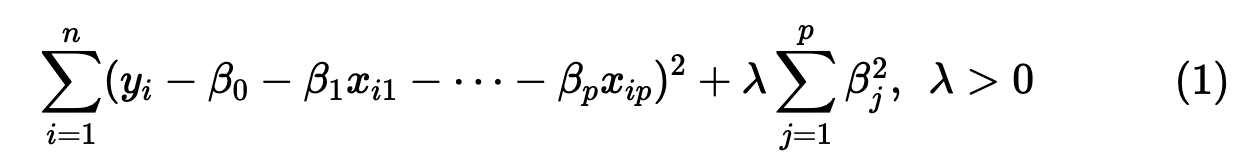

위 식에서 lambda는 하이퍼파라미터 값에 해당하고, 0이 된다면 기존의 선형회귀 모형과 동일해진다. Ridge regression에서 Bias를 계산해 보면 0이 아니기 때문에 Biased Estimator에 해당한다. 그럼에도 불구하고 OLS 추정량보다 분산이 작기 때문에 이 부분에서 장점을 찾을 수 있다. 따라서 OLS 추정량의 MSE보다 더 작게 만드는 lambda를 찾는다면 더 좋은 성능의 모형이 될 수 있다.

> ## Lasso <a class="anchor" id="lasso"></a>
---
Lasso regression은 기존 최소제곱 추정량에 전체 회귀 계수의 절대값의 합을 penalty로 추가한, 즉 L1-norm을 penalty로 갖는 선형회귀 모형이다. 이 모형은 앞선 ridge regression과 비슷하게 overfitting을 방지하는 효과를 갖는다. Ridge regression과 달리 회귀 계수 값이 0으로 수렴하게 되는데, 이는 곧 중요한 설명변수를 남기고 중요하지 않은 변수에 대해서는 영향을 줄임으로써 변수 선택이 가능해지고, 모델의 복잡도를 줄이는 효과를 낳는다. 따라서 좋은 변수만을 남기기 때문에 과적합을 방지할 수 있다. 일부 변수의 중요도가 큰 경우 좋은 성능을 보인다. Lasso regression의 모형은 다음과 같다.  

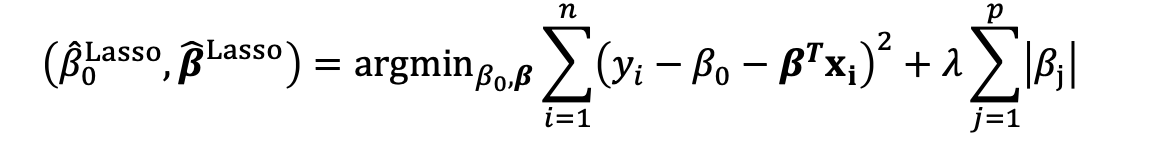
(이때, lambda>0)


> ## ElasticNet <a class="anchor" id="elasticnet"></a>
---
Elastic-net regression은 Ridge(L2-norm)와 Lasso(L1-norm) penalty term을 결합한 형태이다. 두 모형을 절충하여 regularization term으로 활용함으로써 의료 데이터와 같이 dataset의 feature 간 상관관계가 높은 경우에 LASSO보다 좋은 성능을 보인다. 따라서 급격한 회귀계수 변화를 갖는 Lasso regression에 Ridge와 결합함으로써 이러한 경향을 완화시키는 효과를 갖는다.

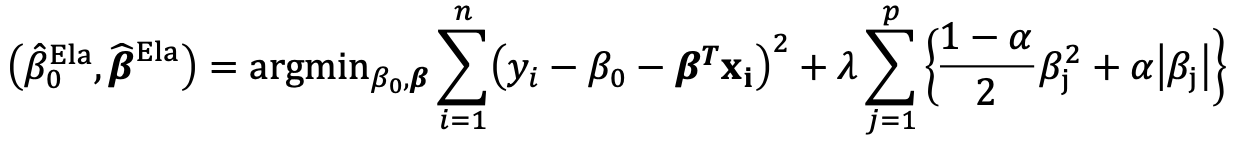
(이때, lambda>0, 0<=alpha<=1)

# Diabetes dataset <a class="anchor" id="dataset"></a>
---
본 과제에서 다룰 데이터셋은 scikit-learn 머신러닝 라이브러리에 내장되어 있는 당뇨병 환자 데이터셋이다. 해당 데이터셋은 당뇨병 환자들의 건강정보 및 질병 발생 정도를 나타내는 변수들로 이루어져 있다. 해당 데이터셋에는 총 442명의 환자에 대한 정보가 존재하고, 총 10가지의 변수와 1가지의 Target 값으로 구성된다. 이때, 10가지의 variable은 다음과 같다.
- age: 나이 (years)
- sex: 성별 (male or female)
- bmi: 체질량 지수 (body mass index)
- bp: 평균 혈압 (average blood pressure)
- s1: 총 혈청 콜레스테롤 (tc, total serum cholesterol)
- s2: 저밀도 지질단백질 (ldl, low-density lipoproteins)
- s3: 고밀도 지질단백질 (hdl, high-density lipoproteins)
- s4: 총 콜레스테롤 / HDL (tch, total cholesterol / HDL)
- s5: 혈중 트리글리세라이드 (ltg, possibly log of serum triglycerides level)
- s6: 혈당 수치 (glu, blood sugar level)

한편, target 값은 1년 후에 질병 진행 정도를 나타내는 숫자로, 해당 값이 클수록 질병 악화를 의미한다. 해당 데이터셋은 10가지의 변수들을 표준화하여 제공하고 있다.

# Model fitting on Diabetes dataset <a class="ancor" id="fitting"></a>
---

> ## Dataset pre-processing <a class="anchor" id="preprocessing"></a>
---

In [311]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [312]:
print(diabetes.feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

In [313]:
X = diabetes.data
y = diabetes.target.reshape(-1,1)
print(X.shape, y.shape)

cols = diabetes.feature_names
cols.append("Target")

(442, 10) (442, 1)


In [314]:
data = np.concatenate([X,y], axis=1)
df = pd.DataFrame(data, columns=cols)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


위 information을 통해 null값이 존재하지 않는 것을 알 수 있다.

In [214]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

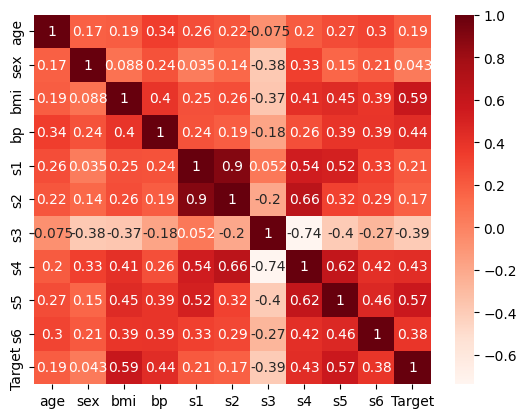

In [215]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

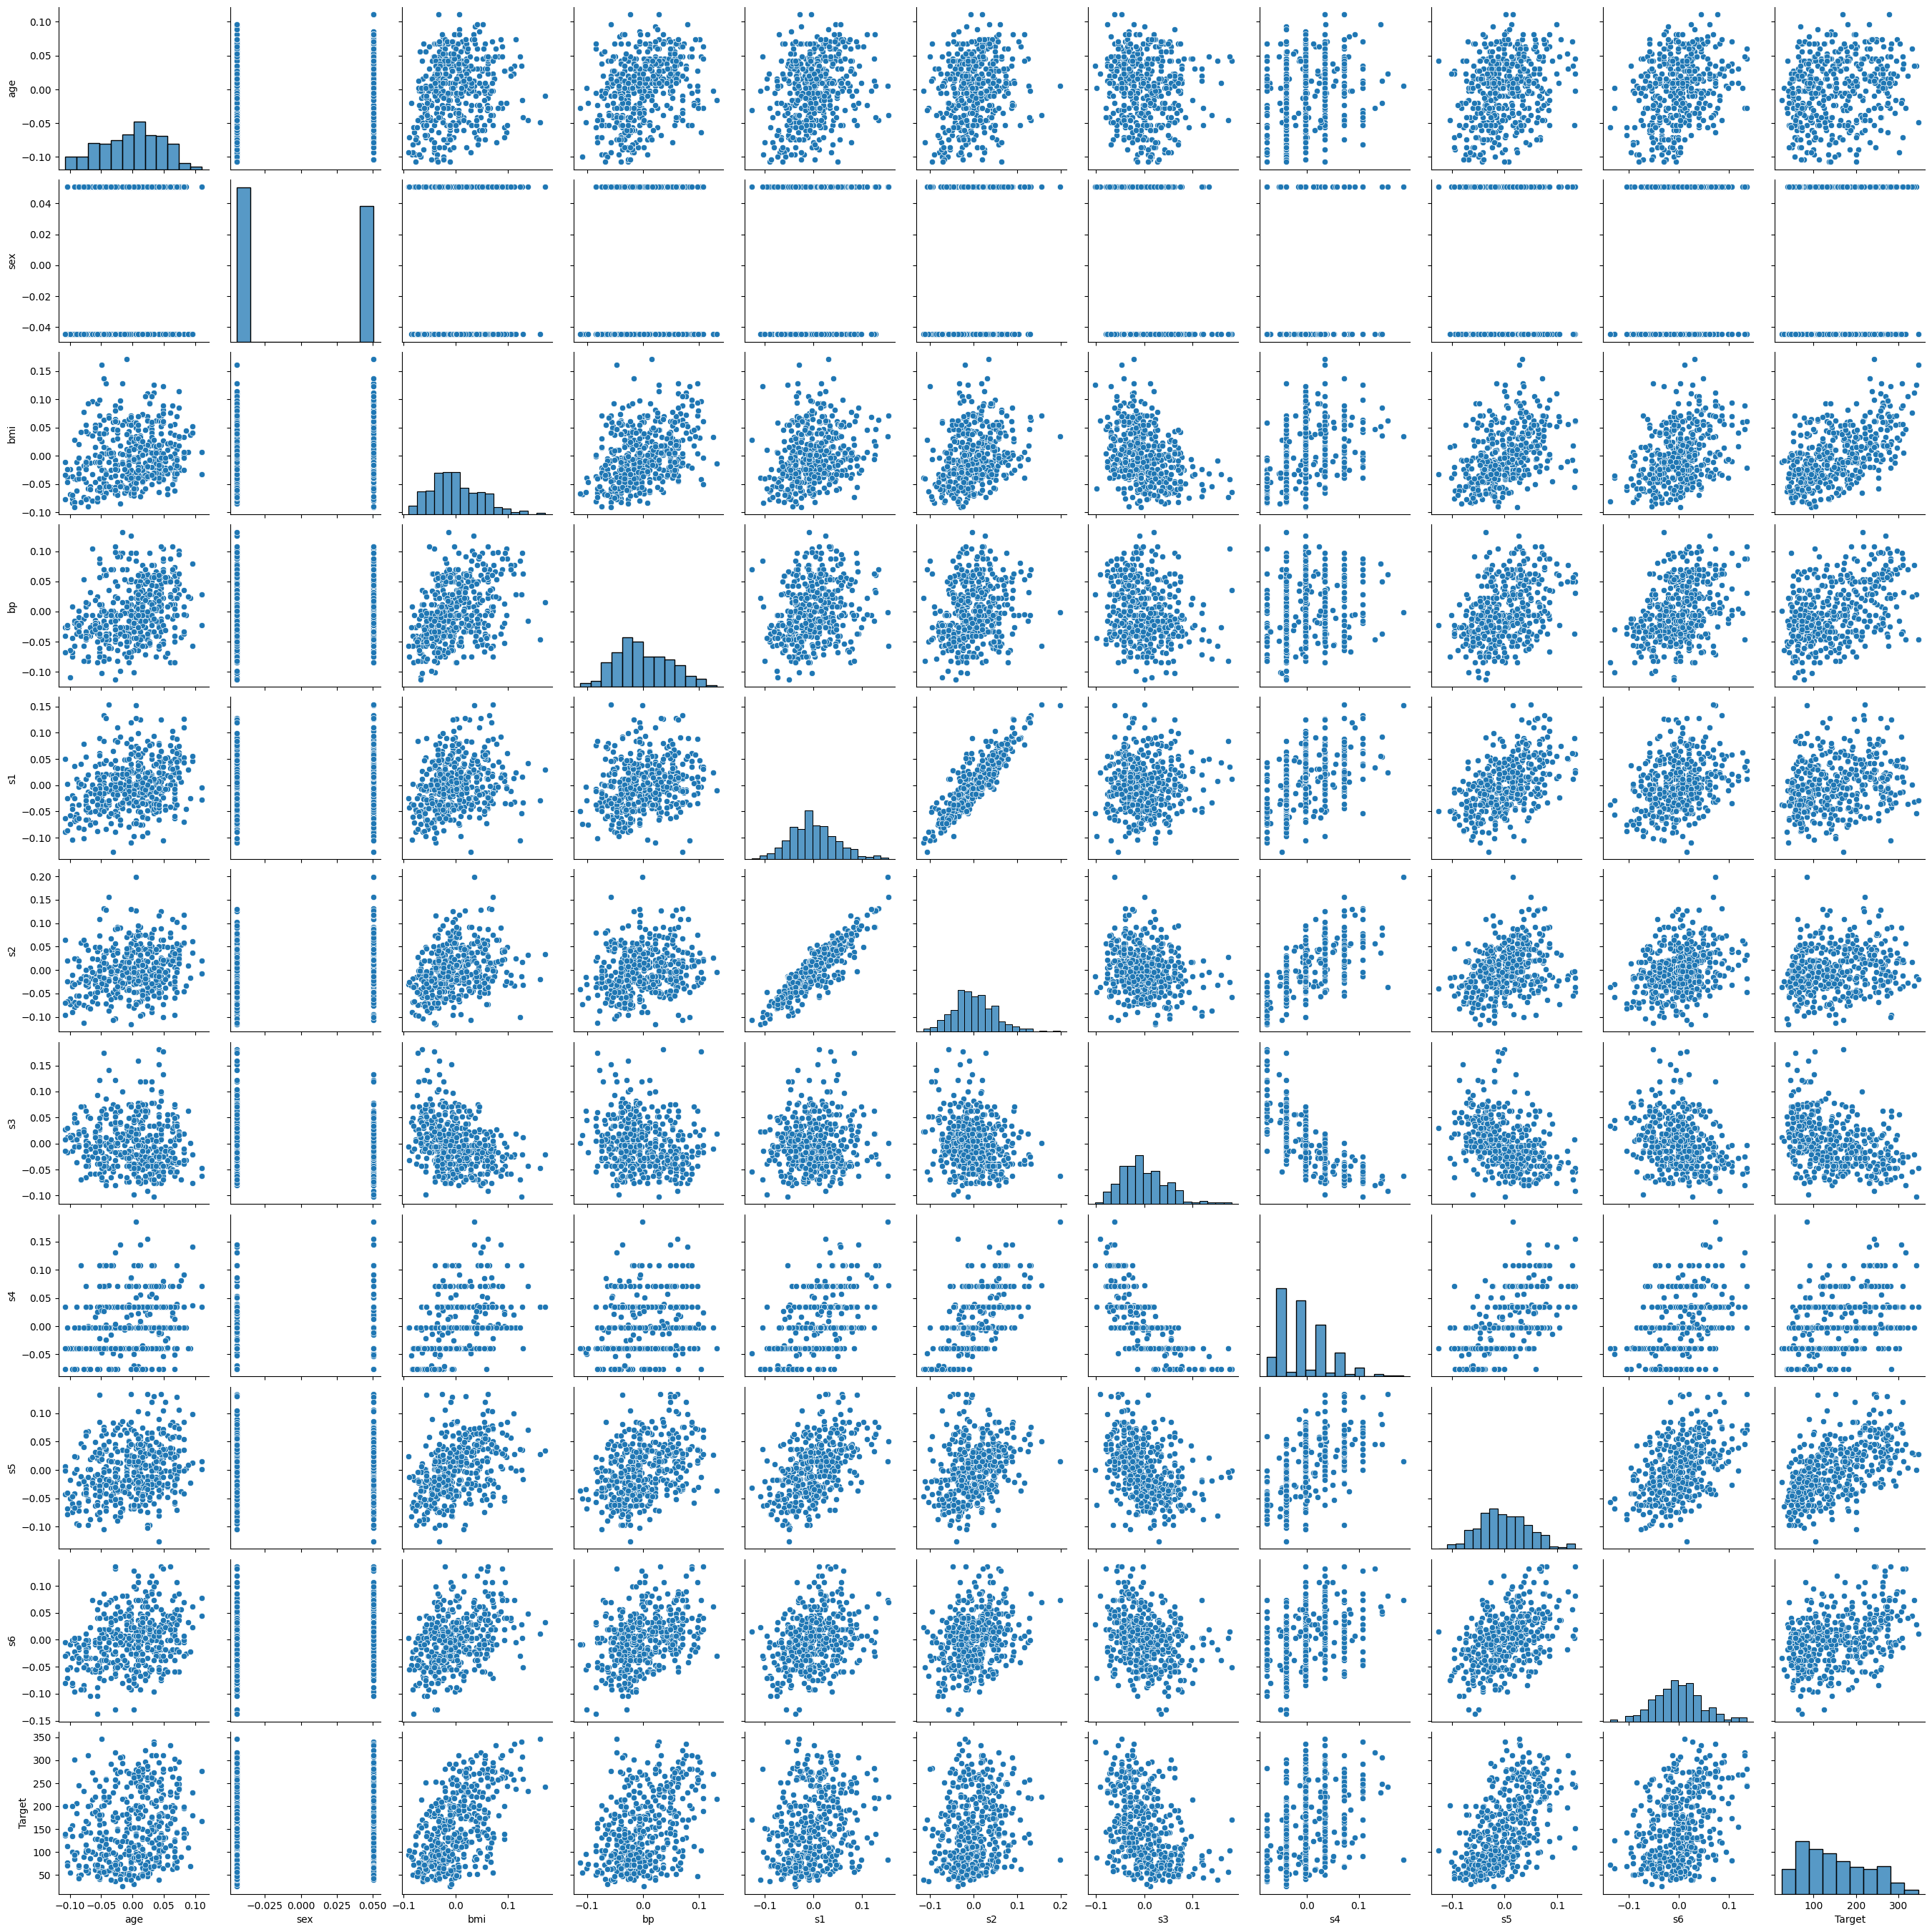

In [184]:
sns.pairplot(df)

In [216]:
df.drop('s1', axis=1)

,age,sex,bmi,bp,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [217]:
scaler = StandardScaler() #각 열의 feature 평균을 0으로 잡고 표준편차를 1로 간주하여 scaling수행
X = scaler.fit_transform(X)

In [218]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

> # Linear Regression without regularization <a class="anchor" id="lr"></a>
---


In [238]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training r2 score: ", r2_score(y_train, y_pred_train))
print("Test r2 score: ", r2_score(y_test, y_pred_test))


Training r2 score:  0.5279193863361498
Test r2 score:  0.45260276297191926


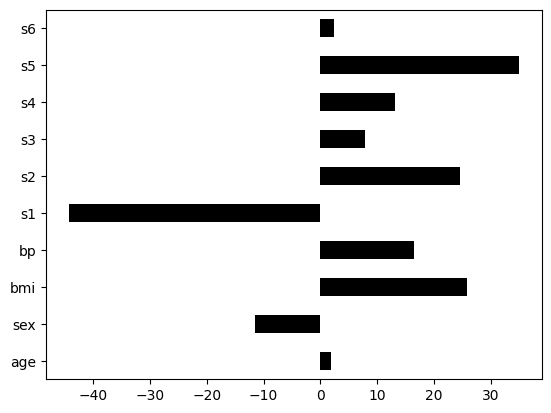

In [239]:
import matplotlib.pyplot as plt
coef = model.coef_[0]

coeffs = pd.Series(coef, index = diabetes.feature_names)
coeffs.plot(kind='barh', cmap='gray')
plt.show()


> # Ridge Regression <a class="anchor" id="ridge_fit"></a>
---


In [264]:
from sklearn.model_selection import cross_val_score, GridSearchCV

ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

print("Training r2 score: ", r2_score(y_train, y_pred_train_ridge))
print("Test r2 score: ", r2_score(y_test, y_pred_test_ridge))

mse_ridge = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_ridge = np.mean(mse_ridge)
print("MSE: ", -(mean_mse_ridge).round(5))


Training r2 score:  0.5276340945510372
Test r2 score:  0.4541435856401669
MSE:  3420.32407


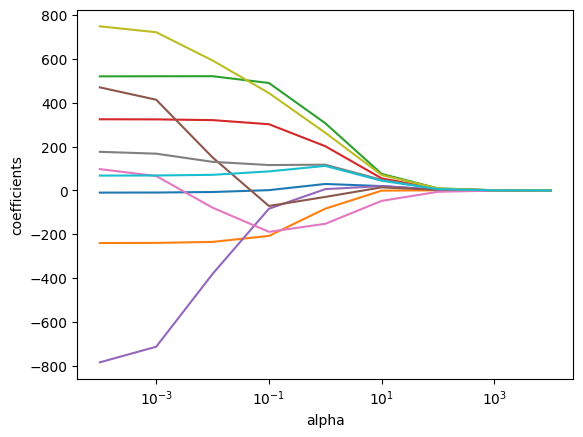

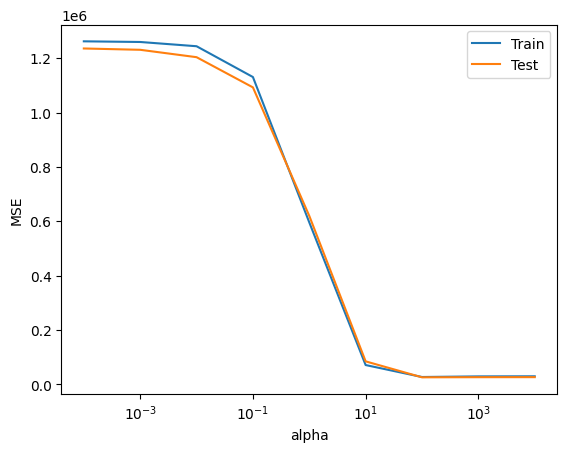

In [290]:
from sklearn.metrics import mean_squared_error

X = diabetes.data
y = diabetes.target

# 조율 모수 범위 설정
alphas = np.logspace(-4, 4, 9)
#alphas = np.power(10, np.linspace(10, -2, num=100))

# 모델 피팅 및 계수 추출
coefs = []
train_errors = []
test_errors = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
    # Calculate MSE on train set
    train_pred = ridge.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_errors.append(train_mse)
    
    # Calculate MSE on test set
    test_pred = ridge.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_errors.append(test_mse)
    
# 그래프 그리기
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')
plt.show()

# Plot MSE vs. alpha
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 최적의 alpha 값 찾기
---
RidgeCV 모델을 활용해 cross validation을 자체적으로 수행하여 최적의 alpha 값을 찾을 수 있다.

In [286]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas =alphas, cv = 5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test)

y_train_pred_cv = ridge_cv.predict(X_train)
y_test_pred_cv = ridge_cv.predict(X_test)

print("회귀계수: ", ridge_cv.coef_[0])
print("최적의 alpha: ", ridge_cv.alpha_)
print("\nTraining r2 score: ", r2_score(y_train, y_train_pred_cv))
print("Test r2 score: ", r2_score(y_test, y_test_pred_cv))
mse_cv = cross_val_score(ridge_cv, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_cv = np.mean(mse_cv)
print(-(mean_mse_cv).round(5))

회귀계수:  [ 2.03737827 -9.80457418 24.06954965 15.10568934 -5.22870194 -4.0823186
 -9.04096216  7.22960388 18.71080954  3.78160188]
최적의 alpha:  43.287612810830616

Training r2 score:  0.5207234669718888
Test r2 score:  0.4608032765106356
3004.82995


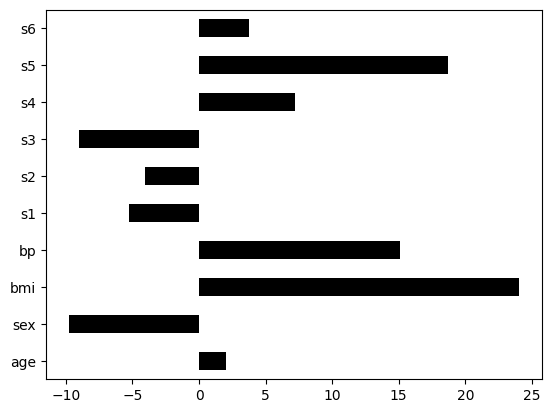

In [287]:
coef_ridge = ridge_cv.coef_[0]
coefs_ridge = pd.Series(coef_ridge, index = diabetes.feature_names)
coefs_ridge.plot(kind = 'barh', cmap = 'gray')
plt.show()

# Lasso Regression <a class="anchor" id="lasso_fit"></a>
---


In [301]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error

X = diabetes.data
y = diabetes.target

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

#alphas
alphas = np.logspace(-4, 4, 9)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

print("Training r2 score: ", r2_score(y_train, y_pred_train_lasso))
print("Test r2 score: ", r2_score(y_test, y_pred_test_lasso))

mse_lasso = cross_val_score(lasso, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_lasso = np.mean(mse_lasso)
print("MSE: ", -(mean_mse_lasso).round(5))

#최적의 alpha 찾기
lasso_cv = LassoCV(alphas =alphas, cv = 5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test)

y_train_pred_lasso_cv = lasso_cv.predict(X_train)
y_test_pred_lasso_cv = lasso_cv.predict(X_test)

print("\n회귀계수: ", lasso_cv.coef_)
print("최적의 alpha: ", lasso_cv.alpha_)
print("\nTraining r2 score: ", r2_score(y_train, y_train_pred_lasso_cv))
print("Test r2 score: ", r2_score(y_test, y_test_pred_lasso_cv))
mse_cv = cross_val_score(lasso_cv, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_cv = np.mean(mse_cv)
print(-(mean_mse_cv).round(5))



Training r2 score:  0.522576868371752
Test r2 score:  0.4669649181976272
MSE:  3850.83849

회귀계수:  [ 0.66642733 -9.29674392 26.39908163 15.41807667 -8.28470419 -0.
 -9.02046644  3.5352979  22.5532393   2.08989393]
최적의 alpha:  1.0

Training r2 score:  0.522576868371752
Test r2 score:  0.4669649181976272
3003.47236


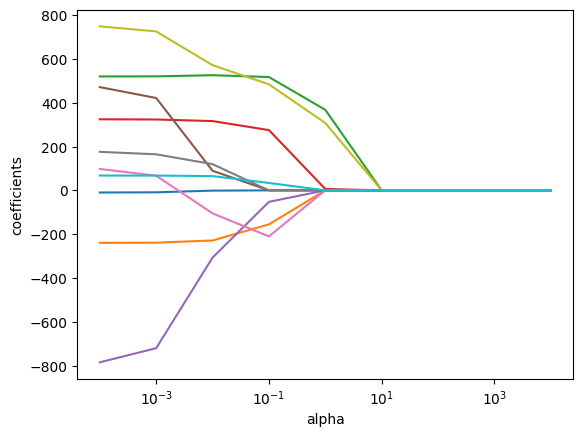

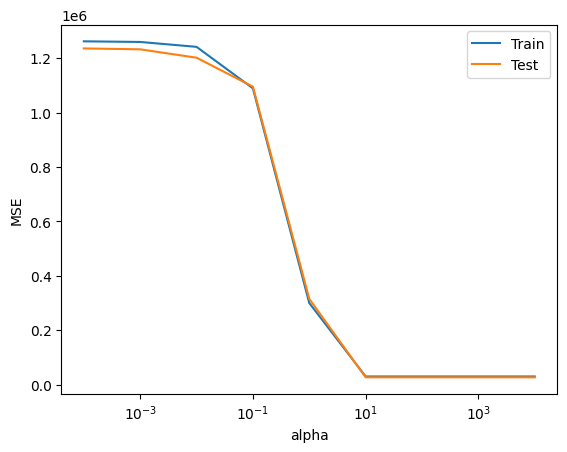

In [291]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
X = diabetes.data
y = diabetes.target

# 조율 모수 범위 설정
alphas = np.logspace(-4, 4, 9)
#alphas = np.power(10, np.linspace(10, -2, num=100))

coefs = []
train_errors = []
test_errors = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
    # trainset MSE
    train_pred = lasso.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_errors.append(train_mse)
    
    # testset MSE
    test_pred = lasso.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_errors.append(test_mse)
    
# 그래프 그리기
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')
plt.show()

# MSE:alpha
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Elastic-Net Regression <a class="anchor" id="elasticnet_fit"></a>
---

In [307]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error

enet = ElasticNet()


X = diabetes.data
y = diabetes.target

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

#alphas
alphas = np.logspace(-4, 4, 9)

enet.fit(X_train, y_train)

y_pred_train_enet = enet.predict(X_train)
y_pred_test_enet = enet.predict(X_test)

print("Training r2 score: ", r2_score(y_train, y_pred_train_enet))
print("Test r2 score: ", r2_score(y_test, y_pred_test_enet))

mse_enet = cross_val_score(enet, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_enet = np.mean(mse_enet)
print("MSE: ", -(mean_mse_enet).round(5))

#최적의 alpha 찾기
enet_cv = ElasticNetCV(alphas =alphas, cv = 5)
enet_cv.fit(X_train, y_train)
y_pred_enet_cv = enet_cv.predict(X_test)

y_train_pred_enet_cv = enet_cv.predict(X_train)
y_test_pred_enet_cv = enet_cv.predict(X_test)

print("\n회귀계수: ", enet_cv.coef_)
print("최적의 alpha: ", enet_cv.alpha_)
print("\nTraining r2 score: ", r2_score(y_train, y_train_pred_enet_cv))
print("Test r2 score: ", r2_score(y_test, y_test_pred_enet_cv))
mse_cv = cross_val_score(enet_cv, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse_cv = np.mean(mse_cv)
print("MSE: ", -(mean_mse_cv).round(5))



Training r2 score:  0.49328467169886825
Test r2 score:  0.45494253006576035
MSE:  5930.20006

회귀계수:  [  1.93932858 -10.62710206  25.38712838  15.76579092  -8.96537602
  -2.01828101  -7.84770348   7.73239169  20.95242329   3.10743605]
최적의 alpha:  0.1

Training r2 score:  0.5236388604951647
Test r2 score:  0.45901944397766004
MSE:  3017.84011


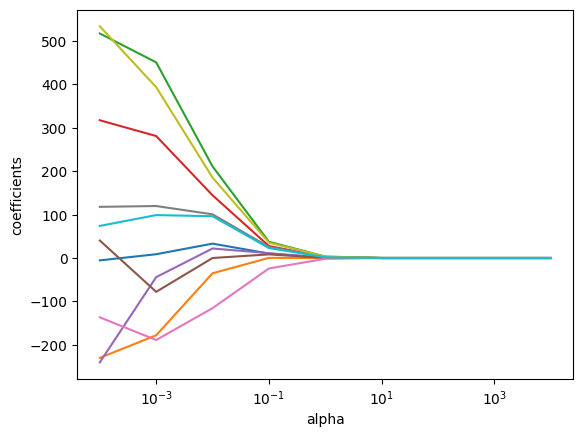

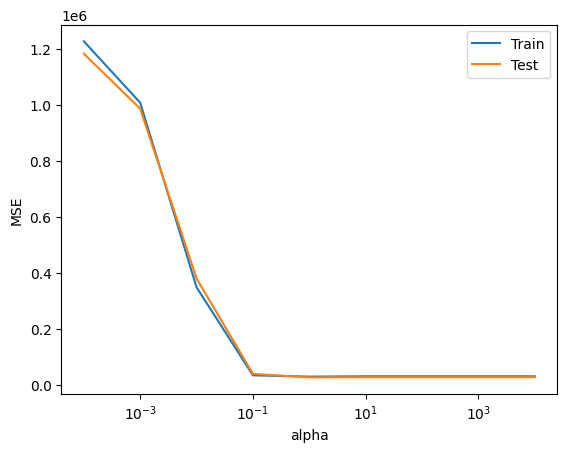

In [309]:
from sklearn.metrics import mean_squared_error
X = diabetes.data
y = diabetes.target

# 조율 모수 범위 설정
alphas = np.logspace(-4, 4, 9)
#alphas = np.power(10, np.linspace(10, -2, num=100))

coefs = []
train_errors = []
test_errors = []

for a in alphas:
    enet = ElasticNet(alpha=a, fit_intercept=False)
    enet.fit(X, y)
    coefs.append(enet.coef_)
    
    # trainset MSE
    train_pred = enet.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_errors.append(train_mse)
    
    # testset MSE
    test_pred = enet.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_errors.append(test_mse)
    
# 그래프 그리기
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')
plt.show()

# MSE:alpha
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 결과 분석
---
Linear Regression w/o regularization, Ridge regression, LASSO regression, Elastic-Net regression 모형에 대한 R2 score를 정리해 보면 다음과 같다.

|모형          |  R2 score   | MSE |
|-----------------|---------|-----|
|Ridge    | 0.4608 | 3004 |
|LASSO        | 0.4669     | 3003 |
|Elastic-Net      | 0.4590 | 3017 |  

일반적으로 feature 수가 많은 경우 lambda값이 증가할 수록 coefficient 값들 중 발산하는 계수 값이 존재하고, 그에 따라 MSE 값 또한 증가하는 결과를 보인다. 하지만 본 데이터셋은 feature 수가 많지 않기 때문에 과적합되는 문제를 피할 수 있었던 것으로 해석할 수 있다. 뿐만 아니라 alpha값이 매우 커지게 되면 회귀계수 값들이 모두 0이 되는 결과를 초래한다. 따라서 적절한 alpha값을 설정하여 alpha=0인 경우에 비해 error값이 작은 alpha를 최적의 값으로 선정하고 모형을 적합할 수 있다.
또, 앞서 LASSO 회귀 모형의 경우 조율모수 값의 변화에 따라 급격한 회귀계수값의 변화를 가지고, Elastic-Net의 경우 Ridge와 결합함으로써 이러한 현상을 완화시킨다고 언급한 바와 같이 alpha 값 변화에 따른 그래프를 확인해 보았을 때 LASSO에 비해 Elastic-Net이 더 완만한 경향을 띄는 것을 확인할 수 있다.